In [1]:
from tqdm import tqdm
import math
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import json

f = open("data.json")
data = json.load(f)
f.close()

In [3]:
data[0]

{'RECORDID': '20200811-38496',
 'label': -1,
 'title': "What to do if you're at risk of eviction",
 'body': 'Alaina Lattin was served an eviction notice last month at her home in Conroe, Texas.\n"It was a very loud banging," Lattin, 32, said. "They just kept screaming, \'Leasing office! Leasing office!\'" Now, the single mother is worried that she and her four children will become homeless.\nLattin is one of millions of Americans facing eviction amid the coronavirus pandemic. Even as unemployment levels remain at historic highs and cases of the virus continue to surge, the federal eviction moratorium in the first stimulus package was allowed to expire at the end of last month.\nPresident Donald Trump said the executive action he took over the weekend would help keep renters in their homes, but advocates say the move won\'t actually do much .\n"It creates the impression that something was done when, in fact, nothing was done," said John Pollock , coordinator of the National Coalition fo

In [4]:
len(data)

714

In [5]:
import spacy
sp = spacy.load('en_core_web_sm')

In [6]:
paragraphs = []

for news in data:
    label = news['label']
    body = news['body']
    
    paragraphs.append([body.strip(), label])
    
#     for p in body.split("\n"):
#         if p.strip() == "":
#             continue
            
#         paragraphs.append([p.strip(), label])

In [7]:
len(paragraphs)

714

In [8]:
paragraphs[0]

['Alaina Lattin was served an eviction notice last month at her home in Conroe, Texas.\n"It was a very loud banging," Lattin, 32, said. "They just kept screaming, \'Leasing office! Leasing office!\'" Now, the single mother is worried that she and her four children will become homeless.\nLattin is one of millions of Americans facing eviction amid the coronavirus pandemic. Even as unemployment levels remain at historic highs and cases of the virus continue to surge, the federal eviction moratorium in the first stimulus package was allowed to expire at the end of last month.\nPresident Donald Trump said the executive action he took over the weekend would help keep renters in their homes, but advocates say the move won\'t actually do much .\n"It creates the impression that something was done when, in fact, nothing was done," said John Pollock , coordinator of the National Coalition for a Civil Right to Counsel.\nMore from Personal Finance:\nTrump wants stimulus checks to be more than $1,20

In [9]:
import re

punctuation = re.compile('[^\w\s]')
space = re.compile('  +')

In [10]:
p = space.sub(' ', punctuation.sub('', paragraphs[0][0]))
p

'Alaina Lattin was served an eviction notice last month at her home in Conroe Texas\nIt was a very loud banging Lattin 32 said They just kept screaming Leasing office Leasing office Now the single mother is worried that she and her four children will become homeless\nLattin is one of millions of Americans facing eviction amid the coronavirus pandemic Even as unemployment levels remain at historic highs and cases of the virus continue to surge the federal eviction moratorium in the first stimulus package was allowed to expire at the end of last month\nPresident Donald Trump said the executive action he took over the weekend would help keep renters in their homes but advocates say the move wont actually do much \nIt creates the impression that something was done when in fact nothing was done said John Pollock coordinator of the National Coalition for a Civil Right to Counsel\nMore from Personal Finance\nTrump wants stimulus checks to be more than 1200\nHow HEALS Act stimulus checks would

In [11]:
sentence = sp(p)

In [12]:
sentence

Alaina Lattin was served an eviction notice last month at her home in Conroe Texas
It was a very loud banging Lattin 32 said They just kept screaming Leasing office Leasing office Now the single mother is worried that she and her four children will become homeless
Lattin is one of millions of Americans facing eviction amid the coronavirus pandemic Even as unemployment levels remain at historic highs and cases of the virus continue to surge the federal eviction moratorium in the first stimulus package was allowed to expire at the end of last month
President Donald Trump said the executive action he took over the weekend would help keep renters in their homes but advocates say the move wont actually do much 
It creates the impression that something was done when in fact nothing was done said John Pollock coordinator of the National Coalition for a Civil Right to Counsel
More from Personal Finance
Trump wants stimulus checks to be more than 1200
How HEALS Act stimulus checks would be diff

In [13]:
for word in sentence:
    print(word.text,  word.lemma_)

Alaina Alaina
Lattin Lattin
was be
served serve
an an
eviction eviction
notice notice
last last
month month
at at
her -PRON-
home home
in in
Conroe Conroe
Texas Texas

 

It -PRON-
was be
a a
very very
loud loud
banging bang
Lattin Lattin
32 32
said say
They -PRON-
just just
kept keep
screaming scream
Leasing lease
office office
Leasing leasing
office office
Now now
the the
single single
mother mother
is be
worried worry
that that
she -PRON-
and and
her -PRON-
four four
children child
will will
become become
homeless homeless

 

Lattin Lattin
is be
one one
of of
millions million
of of
Americans Americans
facing face
eviction eviction
amid amid
the the
coronavirus coronavirus
pandemic pandemic
Even even
as as
unemployment unemployment
levels level
remain remain
at at
historic historic
highs high
and and
cases case
of of
the the
virus virus
continue continue
to to
surge surge
the the
federal federal
eviction eviction
moratorium moratorium
in in
the the
first first
stimulus stimulus
pack

The the
average average
rate rate
on on
a a
card card
is be
currently currently
around around
16 16

 

Other other
ways way
to to
come come
up up
with with
rent rent
can can
include include
borrowing borrowing
from from
family family
and and
friends friend
or or
from from
your -PRON-
retirement retirement
plan plan
Rossman Rossman
said say

 

If if
an an
eviction eviction
hearing hearing
is be
looking look
inevitable inevitable
try try
to to
get get
a a
lawyer lawyer
One one
study study
in in
New New
Orleans Orleans
found find
that that
more more
than than
65 65
of of
tenants tenant
with with
no no
legal legal
representation representation
were be
evicted evict
compared compare
with with
fewer few
than than
15 15
of of
those those
who who
did do
have have
a a
lawyer lawyer

 

You -PRON-
can can
find find
lowcost lowcost
or or
free free
legal legal
help help
with with
an an
eviction eviction
in in
your -PRON-
state state
at at
Lawhelporg Lawhelporg

 

Sometimes sometimes
the the
pap

In [14]:
paragraphs_lemmaed = []

for par in tqdm(paragraphs):
    p = space.sub(' ', punctuation.sub('', par[0]))
    s = sp(p)
    
    words = []
    
    for w in s:
        words.append(w.lemma_.lower())
        
    paragraphs_lemmaed.append([" ".join(words), par[1]])
    
paragraphs_lemmaed[0]

100%|██████████| 714/714 [00:50<00:00, 14.03it/s]


['alaina lattin be serve an eviction notice last month at -pron- home in conroe texas \n -pron- be a very loud bang lattin 32 say -pron- just keep scream lease office leasing office now the single mother be worry that -pron- and -pron- four child will become homeless \n lattin be one of million of americans face eviction amid the coronavirus pandemic even as unemployment level remain at historic high and case of the virus continue to surge the federal eviction moratorium in the first stimulus package be allow to expire at the end of last month \n president donald trump say the executive action -pron- take over the weekend would help keep renter in -pron- home but advocate say the move will not actually do much \n -pron- create the impression that something be do when in fact nothing be do say john pollock coordinator of the national coalition for a civil right to counsel \n more from personal finance \n trump want stimulus check to be more than 1200 \n how heals act stimulus check woul

In [15]:
words = set()

for par in tqdm(paragraphs_lemmaed):
    for w in par[0].split():
        words.add(w)

words = list(words)
        
len(words)

100%|██████████| 714/714 [00:00<00:00, 7365.47it/s]


24133

In [16]:
words[:10]

['oven',
 'testament',
 'flaw',
 'popularize',
 'tight',
 'bouchesdurhone',
 'runny',
 'elizabeth',
 '67558',
 'meanwhile']

In [17]:
word_paragraph_count = {}

for word in tqdm(words):
    word_paragraph_count[word] = 0
    for par in paragraphs_lemmaed:
        if word in par[0]:
            word_paragraph_count[word] += 1

100%|██████████| 24133/24133 [00:40<00:00, 594.40it/s]


In [18]:
list(word_paragraph_count.items())[:10]

[('oven', 6),
 ('testament', 1),
 ('flaw', 3),
 ('popularize', 1),
 ('tight', 32),
 ('bouchesdurhone', 1),
 ('runny', 2),
 ('elizabeth', 18),
 ('67558', 1),
 ('meanwhile', 65)]

In [19]:
class_paragraph_count = {-1: 0, 0: 0, 1: 0}

for par in tqdm(paragraphs_lemmaed):
    class_paragraph_count[par[1]] += 1
    
class_paragraph_count

100%|██████████| 714/714 [00:00<00:00, 1554897.74it/s]


{-1: 374, 0: 159, 1: 181}

In [20]:
word_class_paragraph_count = {}

for word in tqdm(words):
    word_class_paragraph_count[word] = {-1: 0, 0: 0, 1: 0}
    for par in paragraphs_lemmaed:
        if word in par[0]:
            word_class_paragraph_count[word][par[1]] += 1

100%|██████████| 24133/24133 [00:40<00:00, 593.34it/s]


In [21]:
list(word_class_paragraph_count.items())[:10]

[('oven', {-1: 4, 0: 0, 1: 2}),
 ('testament', {-1: 1, 0: 0, 1: 0}),
 ('flaw', {-1: 1, 0: 2, 1: 0}),
 ('popularize', {-1: 1, 0: 0, 1: 0}),
 ('tight', {-1: 24, 0: 5, 1: 3}),
 ('bouchesdurhone', {-1: 1, 0: 0, 1: 0}),
 ('runny', {-1: 1, 0: 1, 1: 0}),
 ('elizabeth', {-1: 6, 0: 9, 1: 3}),
 ('67558', {-1: 1, 0: 0, 1: 0}),
 ('meanwhile', {-1: 42, 0: 11, 1: 12})]

In [22]:
total = len(paragraphs_lemmaed)
total

714

In [23]:
pmi = {}

for word in tqdm(words):
    pmi[word] = {}
    
    if word_class_paragraph_count[word][-1] != 0:
        pmi[word][-1] = math.log(
            (word_class_paragraph_count[word][-1] / total) / 
            (word_paragraph_count[word] * class_paragraph_count[-1] / total / total))
    else:
        pmi[word][-1] = math.log(
            (1 / total) / 
            (word_paragraph_count[word] * class_paragraph_count[-1] / total / total))
        
    if word_class_paragraph_count[word][1] != 0:
        pmi[word][1] = math.log(
            (word_class_paragraph_count[word][1] / total) / 
            (word_paragraph_count[word] * class_paragraph_count[1] / total / total))
    else:
        pmi[word][1] = math.log(
            (1 / total) / 
            (word_paragraph_count[word] * class_paragraph_count[1] / total / total))

100%|██████████| 24133/24133 [00:00<00:00, 466988.41it/s]


In [24]:
S = {}

for word, values in pmi.items():
    S[word] = values[1] - values[-1]

In [25]:
f = open("pmi.json", "w")
json.dump(S, f)
f.close()

In [26]:
df = pd.DataFrame.from_dict(word_paragraph_count, orient='index')
df

,0
oven,6
testament,1
flaw,3
popularize,1
tight,32
...,...
newcomers,1
outdate,4
propose,30
huntingtons,1


array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

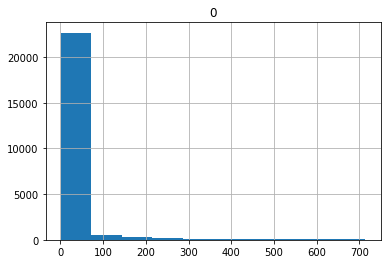

In [27]:
df.hist()

In [28]:
df[df[0]>=100].shape

(1165, 1)

In [29]:
df.loc["lockdown"]

0    163
Name: lockdown, dtype: int64